# Анализ бизнес показателей

## Описание проекта

Компания по разработке развлекательного приложения Procrastinate Pro+, несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки. <br>

<b>Цель</b>

Разобраться в причинах получаемых компанией убытков и помочь компании выйти в плюс.

<b>Задачи:</b>

•	выяснить откуда приходят пользователи и какими устройствами они пользуются,<br>
•	рассчитать стоимость привлечение пользователей из различных рекламных каналов;<br>
•	сколько денег приносит каждый клиент,<br>
•	выяснить когда расходы на привлечение клиента окупаются,<br>
•	выяснить какие факторы мешают привлечению клиентов.


<b>Описание данных</b>

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:<br>
•	visits_info_short.csv - лог сервера с данными об их посещениях,<br>
•	orders_info_short.csv - выгрузка их покупок за этот период,<br>
•	costs_info_short.csv - рекламные расходы.<br>

Структура visits_info_short.csv:<br>

•	User Id — уникальный идентификатор пользователя,<br>
•	Region — страна пользователя,<br>
•	Device — тип устройства пользователя,<br>
•	Channel — идентификатор источника перехода,<br>
•	Session Start — дата и время начала сессии,<br>
•	Session End — дата и время окончания сессии.<br>

Структура orders_info_short.csv:<br>

•	User Id — уникальный идентификатор пользователя,<br>
•	Event Dt — дата и время покупки,<br>
•	Revenue — сумма заказа.<br>

Структура costs_info_short.csv:<br>

•	dt — дата проведения рекламной кампании,<br>
•	Channel — идентификатор рекламного источника,<br>
•	costs — расходы на эту кампанию.


## Загрузка и обработка данных

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
#импортируем библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
#загружаем данные
vizits = pd.read_csv('/datasets/visits_info_short.csv') 
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
vizits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
vizits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [8]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [9]:
#изменим регистр в названиях столбцов
vizits.columns = vizits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [10]:
#заменим пробелы в названиях столбцов на нижнее подчеркивание "_":
vizits.columns = vizits.columns.str.replace(' ', '_')
orders.columns = orders.columns.str.replace(' ', '_')

Проверим данные на наличие дубликатов

In [11]:
vizits.duplicated().sum()

0

In [12]:
orders.duplicated().sum()

0

In [13]:
costs.duplicated().sum()

0

In [14]:
#приведем данные к нужному формату
vizits['session_start'] = pd.to_datetime(vizits['session_start'])
vizits['session_end'] = pd.to_datetime(vizits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Вывод:
В процессе преобработки данных были приведены форматы столбцов с датами к соответствующему типу данных. 
Названия столбцов приведены к нижнему регистру. Пробелы в названиях столбцов заменены на_. Пустых значений и дубликатов в даных не обнаружено. 

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [16]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [17]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [18]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [19]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [20]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [21]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [22]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [23]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [24]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.<br>
Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.<br>
Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. <br>

### Составление профилей пользователей

In [25]:
#Составим профили пользователей
profiles = get_profiles(vizits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [26]:
#минимальную и максимальную даты привлечения пользователей
min_date = profiles['first_ts'].min()
max_date = profiles['first_ts'].max()
print('минимальная дата привлечения пользователей', min_date.date())
print('максимальная дата привлечения пользователей', max_date.date())

минимальная дата привлечения пользователей 2019-05-01
максимальная дата привлечения пользователей 2019-10-27


Полученные данные содержат информацию о 150008 пользователях, привлеченных за период с 1.05.2019 по 27.10.2019.


### Анализ пользователей по региональному признаку

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 

In [27]:
#построим таблицу, отражающую количество пользователей и долю платящих из каждой страны
report_region = (
    profiles.groupby('region').agg({'user_id':'nunique','payer':['sum','mean']}).sort_values(by=('payer','sum'),ascending=False)
)
report_region

user_id payer          
              nunique   sum      mean
region                               
United States  100002  6902  0.069019
UK              17575   700  0.039829
France          17450   663  0.037994
Germany         14981   616  0.041119

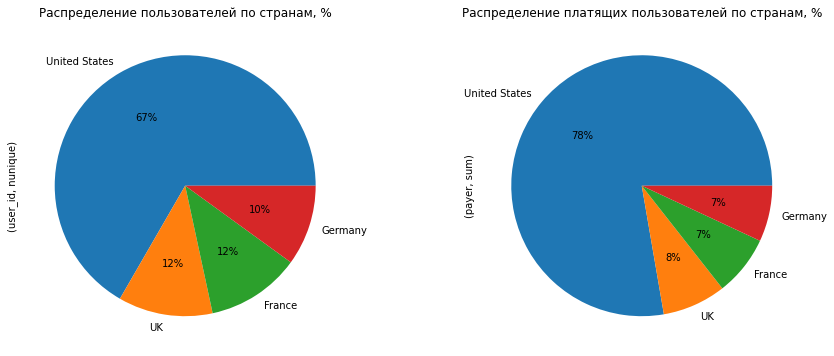

In [28]:
#графики распределения пользователей по странам
plt.figure(figsize=(15,6))
report_region[('user_id','nunique')].plot(kind='pie', autopct='%1.0f%%', title='Распределение пользователей по странам, %', ax=plt.subplot(1,2,1))
report_region[('payer','sum')].plot(kind='pie', autopct='%1.0f%%', title='Распределение платящих пользователей по странам, %', ax=plt.subplot(1,2,2));

Приложением пользуются жители США, Великобритании, Франции и Германии.<br>
2/3 пользователей приходится на США. Наибольшее количество платящих клиентов (78%) также относится к США. <br>
Доля платящих пользователей выше всего в США и составляет 6,9%. Доля платящих пользователей в Германии - 4,1%, из Великоритании и Франции - 4,0% и 3,8% соответственно.

### Анализ распределения пользователей по  используемым устройствам

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 

In [29]:
#построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
report_device = (
    profiles.groupby('device').agg({'user_id':'nunique','payer':['sum','mean']}).sort_values(by=('payer','sum'),ascending=False)
)
report_device

user_id payer          
        nunique   sum      mean
device                         
iPhone    54479  3382  0.062079
Android   35032  2050  0.058518
Mac       30042  1912  0.063644
PC        30455  1537  0.050468

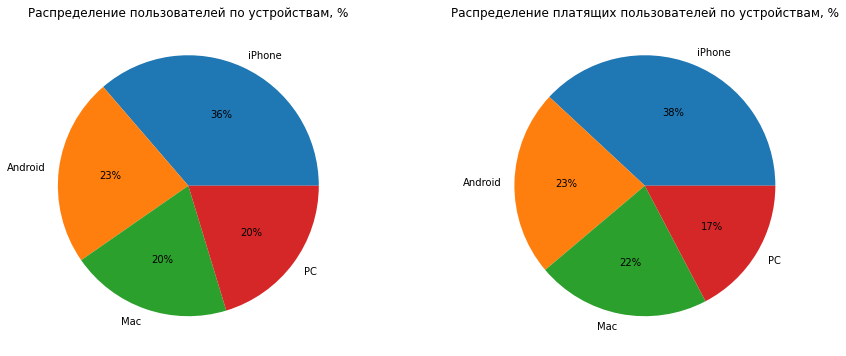

In [30]:
plt.figure(figsize=(15,6))
(
    report_device[('user_id','nunique')]
    .plot(kind='pie', autopct='%1.0f%%', title='Распределение пользователей по устройствам, %', ax=plt.subplot(1,2,1))
    .set(ylabel=None)
)
(
    report_device[('payer','sum')]
    .plot(kind='pie', autopct='%1.0f%%', title='Распределение платящих пользователей по устройствам, %', ax=plt.subplot(1,2,2))
    .set(ylabel=None)
);

In [31]:
#посмотрим, как пользователи разных устройств распределены по странам
report_devices_region = profiles.pivot_table(index='region', columns='device', values='user_id', aggfunc='nunique', margins=True)
report_devices_region.div(report_devices_region.iloc[:,-1], axis=0).round(2)

device,Android,Mac,PC,iPhone,All
region,,,,,
France,0.30,0.11,0.40,0.20,1.0
Germany,0.30,0.11,0.40,0.20,1.0
UK,0.29,0.10,0.41,0.20,1.0
United States,0.20,0.25,0.10,0.45,1.0
All,0.23,0.20,0.20,0.36,1.0


<b>Вывод:</b> 36% пользователей пользуются iPhone, 23% предпочитают Android, по 20% - PC и Mac. <br>
При этом конверсия в платящих пользователей не сильно отличается между пользователями разных устройств и колеблется от 6,36% для пользователей Mac до 5,05% для пользователей PC. <br>
Соответственно, доля платящих пользователей, использующих iPhone составляет 38%, Android- 23%, Mac - 22%, PC - 17%. <br>
Анализ использования различных устройств по странам показал, что в Германии, Франции и Великобритании предпочтения схожи: 40% предпочитают PC, 30% используют Android, 20% - iPhone, 11%-Mac. <br>
Пользователи США, в свою очередь, предпочитают iPhone (45%) и Mac (25%), 20% испоьзуют Android, 10% используют PC.

### Анализ рекламных источников

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. 

In [32]:
#построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения
report_costs = profiles.groupby('channel').agg({'user_id':'nunique','payer':['sum','mean']}).sort_values(by=('user_id','nunique'),ascending=False)
report_costs

user_id payer          
                   nunique   sum      mean
channel                                   
organic              56439  1160  0.020553
FaceBoom             29144  3557  0.122049
TipTop               19561  1878  0.096007
OppleCreativeMedia    8605   233  0.027077
LeapBob               8553   262  0.030633
WahooNetBanner        8553   453  0.052964
RocketSuperAds        4448   352  0.079137
MediaTornado          4364   156  0.035747
YRabbit               4312   165  0.038265
AdNonSense            3880   440  0.113402
lambdaMediaAds        2149   225  0.104700

Больше всего бользователей приходит из органических источников, однако конверсия в платящих пользователеей здесь составляет лишь 2,06%.
Среди рекламных источников больше всего пользоваталей дают FaceBoom	и TipTop.  Они же привлекают больше всего платящих пользователей.

In [33]:
#рекламные каналы с макисмальной долей привлеченных пользователей
report_costs[('payer','mean')].sort_values(ascending=False).round(2).head(5)

channel
FaceBoom          0.12
AdNonSense        0.11
lambdaMediaAds    0.10
TipTop            0.10
RocketSuperAds    0.08
Name: (payer, mean), dtype: float64

Доля платящих пользователей больше всего на FaceBoom, AdNonSense, lambdaMediaAds, TipTop.

''

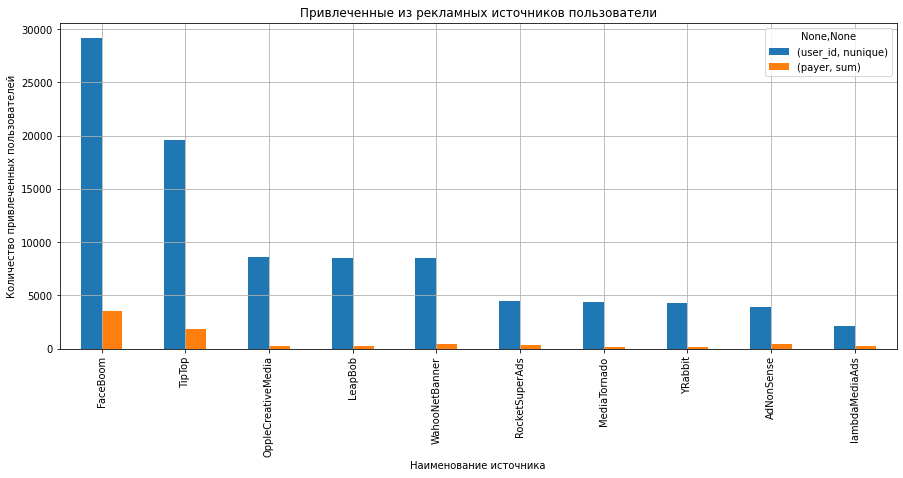

In [34]:
#
report_costs.query('channel!="organic"').plot(kind='bar', y=[('user_id','nunique'),('payer','sum')], grid=True, figsize=(15,6))
plt.title('Привлеченные из рекламных источников пользователи')
plt.xlabel('Наименование источника')
plt.ylabel('Количество привлеченных пользователей')
;

In [35]:
#добавим разбивку по странам
profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc='nunique', margins=True).fillna(0)
                                                                                                

region,France,Germany,UK,United States,All
channel,,,,,
AdNonSense,1366.0,1219.0,1295.0,0.0,3880
FaceBoom,0.0,0.0,0.0,29144.0,29144
LeapBob,2988.0,2519.0,3046.0,0.0,8553
MediaTornado,0.0,0.0,0.0,4364.0,4364
OppleCreativeMedia,2991.0,2562.0,3052.0,0.0,8605
RocketSuperAds,0.0,0.0,0.0,4448.0,4448
TipTop,0.0,0.0,0.0,19561.0,19561
WahooNetBanner,2971.0,2579.0,3003.0,0.0,8553
YRabbit,0.0,0.0,0.0,4312.0,4312


Компания использует 10 рекламных источников, 5 из которых привлекают пользователей из США, другие 5 - из Германии, Франции и Великобритании.

<b>Вывод:</b>
Полученные данные содержат информацию о 150008 пользователях из 4 стран, привлеченных за период с 1.05.2019 по 27.10.2019. <br> 
2/3 пользователей заходили в приложение из США. Наибольшее количество платящих клиентов (78%) в рассматриваемом периоде также относится к США. <br> 
Доля платящих пользователей выше всего в США и составляет 6,9%. Доля платящих пользователей в Германии - 4,1%, из Великоритании и Франции - 4,0% и 3,8% соответственно.<br> 
36% пользователей пользуются iPhone, 23% предпочитают Android, по 20% - PC и Mac. При этом конверсия в платящих пользователей не сильно отличается между пользователями разных устройств и колеблется от 6,36% для пользователей Mac до 5,05% для пользователей PC. Соответственно, доля платящих пользователей, использующих iPhone составляет 38%, Android- 23%, Mac - 22%, PC - 17%. <br>
Анализ использования различных устройств по странам показал, что в Германии, Франции и Великобритании предпочтения схожи: 40% предпочитают PC, 30% используют Android, 20% - iPhone, 11%-Mac. Пользователи США, в свою очередь, предпочитают iPhone (45%) и Mac (25%), 20% испоьзуют Android, 10% используют PC.<br>
Анализ рекламных источников показал, что компания использует 10 рекламных источников, 5 из которых работают только в США и 5 в Германии, Франции и Великобритании.<br>
Больше всего платящих пользователей пришло из FaceBoom, TipTop. Доля платящих пользователей больше всего на FaceBoom, AdNonSense, lambdaMediaAds, TipTop.

## Маркетинг

Найдем общую сумму расходов на маркетинг.
Выясним, сколько денег потратили на каждый источник и оценим динамику расходов во времени.
Рассчитаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

### Расходы на маркетинг

In [36]:
print('Общая сумма расходов на маркетинг составляет', costs['costs'].sum().round(),'долл.')

Общая сумма расходов на маркетинг составляет 105497.0 долл.


In [37]:
#распределение по рекламным каналам
costs_by_channel = costs.groupby('channel')['costs'].sum().sort_values(ascending=False).reset_index()
costs_by_channel['costs%'] = (costs_by_channel['costs']/costs_by_channel['costs'].sum()).round(2)
costs_by_channel

,channel,costs,costs%
0,TipTop,54751.30,0.52
1,FaceBoom,32445.60,0.31
2,WahooNetBanner,5151.00,0.05
3,AdNonSense,3911.25,0.04
4,OppleCreativeMedia,2151.25,0.02
5,RocketSuperAds,1833.00,0.02
6,LeapBob,1797.60,0.02
7,lambdaMediaAds,1557.60,0.01
8,MediaTornado,954.48,0.01
9,YRabbit,944.22,0.01


Компания использует 10 источников привлечения клиентов. Большая часть расходов на рекламу (83% от общих затарт на рекламу) приходится на TipTop и FaceBoom. Обе компании работают только на рынке США. Суммарные расходы на привлечение пользователей США составляют 90 928,6 долл. или 86% от общих затарт на рекламу.

Построим график изменения расходов во времени по каждому источнику  по неделям и по месяцам. 

In [38]:
#выделим недели и месяцы в таблице маркетинговых расходов
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

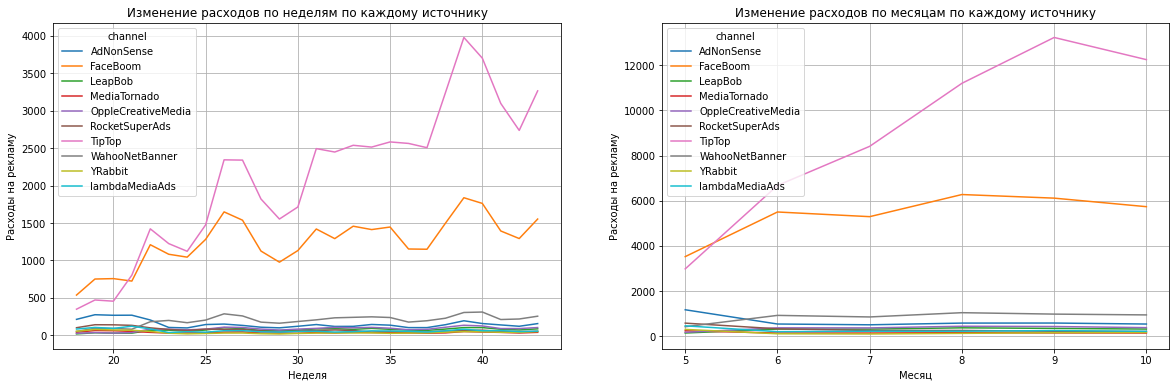

In [39]:
#строим графики
plt.figure(figsize=(20,6))
(
    costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
    .plot(grid=True, ax=plt.subplot(1,2,1))
)
plt.title('Изменение расходов по неделям по каждому источнику')
plt.xlabel('Неделя')
plt.ylabel('Расходы на рекламу')

(
    costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
    .plot(grid=True, ax=plt.subplot(1,2,2))
)
plt.title('Изменение расходов по месяцам по каждому источнику')
plt.xlabel('Месяц')
plt.ylabel('Расходы на рекламу')
plt.show()

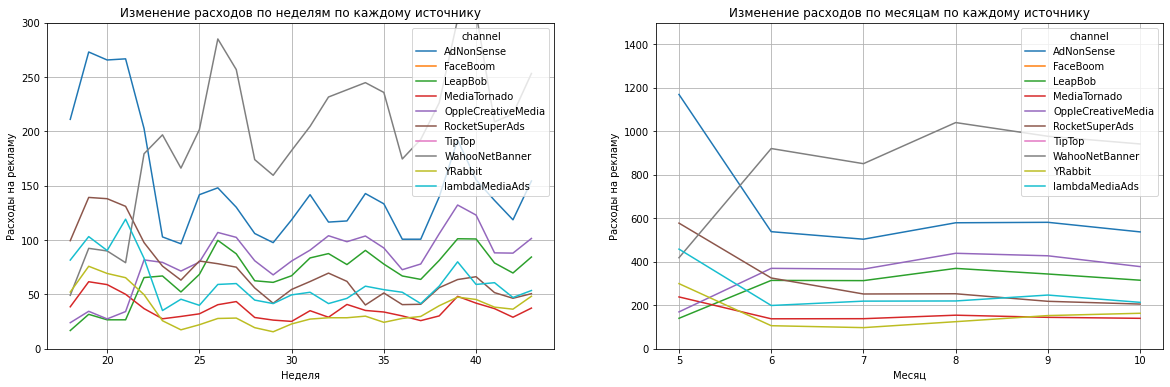

In [40]:
#задаем ограничения по y для лучшей визуализации нижней части графика
plt.figure(figsize=(20,6))
(
    costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
    .plot(grid=True, ylim=(0,300), ax=plt.subplot(1,2,1))
)
plt.title('Изменение расходов по неделям по каждому источнику')
plt.xlabel('Неделя')
plt.ylabel('Расходы на рекламу')

(
    costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
    .plot(grid=True, ylim=(0,1500), ax=plt.subplot(1,2,2))
)
plt.title('Изменение расходов по месяцам по каждому источнику')
plt.xlabel('Месяц')
plt.ylabel('Расходы на рекламу')
plt.show()

Динамика изменений расходов на рекламу показывает значительный рост расходов в июне 2019 по направлениям TipTop и FaceBoom. 
При этом величина расходов на продвижение продукта на TipTop росли на протяжении всего периода. 

### Расчет CAC для каждого источника.

In [41]:
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False).round(2)

channel
TipTop                2.80
FaceBoom              1.11
AdNonSense            1.01
lambdaMediaAds        0.72
WahooNetBanner        0.60
RocketSuperAds        0.41
OppleCreativeMedia    0.25
YRabbit               0.22
MediaTornado          0.22
LeapBob               0.21
organic               0.00
Name: acquisition_cost, dtype: float64

Анализ стоимости привлечения одного пользователя так же показал большие затраты по направлению TipTop. Привлечение одного пользователя здесь обходится компании в 2,80 долл., в то время как средние затраты на привлечение одного пользователя на FaceBoom в 2,5 раза ниже и составляют 1,11 долл. Стомиость одного пользователя привлеченного AdNonSense составила 1,01 долл.

<b>Вывод:</b> Большая часть расходов на рекламу (83% от общих затарт на рекламу) приходится на TipTop и FaceBoom. Обе компании работают только на рынке США. Суммарные расходы на привлечение пользователей США составляют 90 928,6 долл. или 86% от общих затарт на рекламу.
В июне 2019 были значительно увеличены расходы по направлениям TipTop и FaceBoom. 
При этом величина расходов на продвижение продукта на TipTop росли на протяжении всего периода.
Привлечение одного пользователя на TipTop обходится компании в 2,8 долл., в то время как средние затраты на привлечение одного пользователя на FaceBoom в 2,5 раза ниже и составляют 1,11 долл. Стоимость одного пользователя привлеченного AdNonSense составила 1,01 долл. 

## Оценка окупаемости рекламы

Проанализируем окупаемость рекламы, конверсию и удержание пользователей.
Анализ проведем как в целом по всем клиентам, так и с разбивкой по категориальным признакам (устройства, страна, рекламный канал)<br>
Дата наблюдения - 1 ноября 2019 года.<br>
Учтем, что бизнес-планом заложен максимальный срок окупаемости рекламы - две недели после привлечения.<br>
Органических пользователей исключим, так как стоимость их привлечения равна 0.

In [42]:
#задаем дату наблюдения
observation_date = datetime(2019,11,1).date()
# и горизонт анализа
horizon_days = 14
#исключаем органических пользователей
profiles = profiles.query('channel != "organic"')

### Анализ окупаемости рекламы в целом

In [43]:
#расчет LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

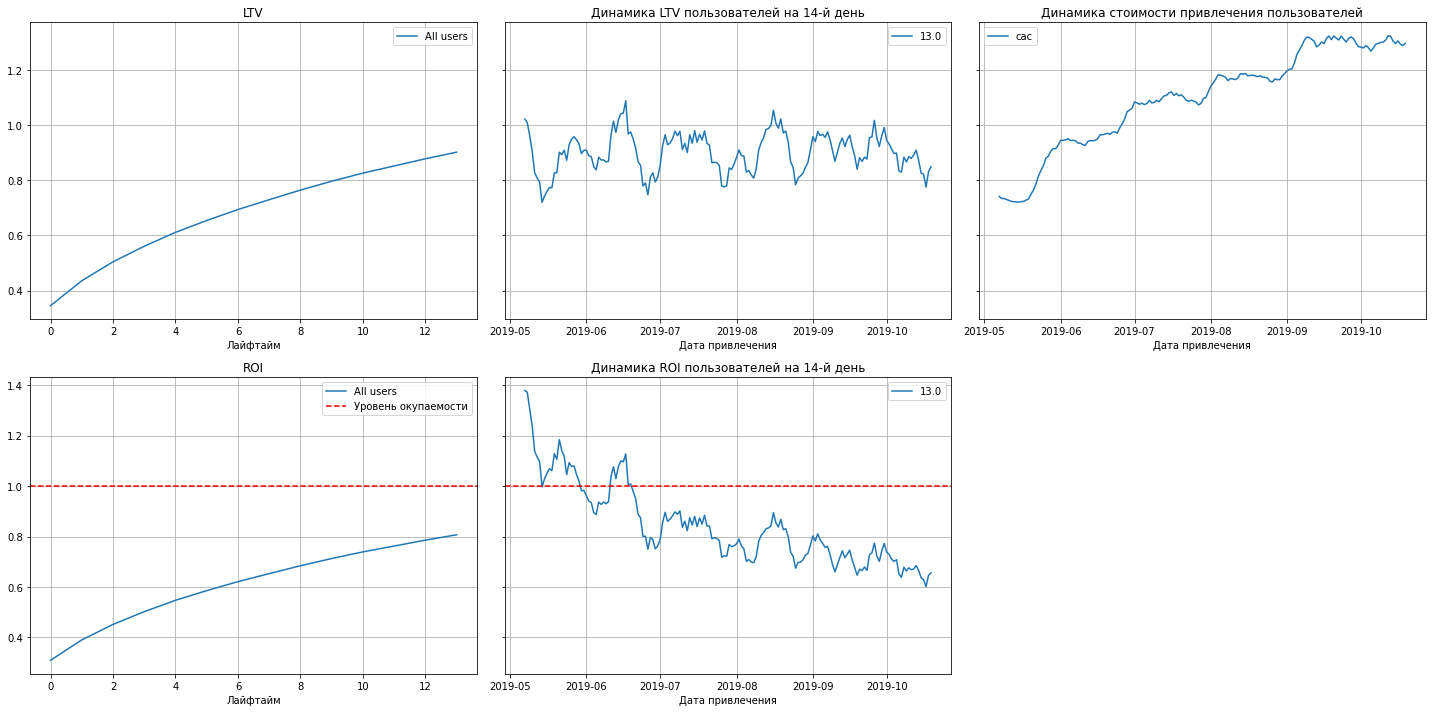

In [44]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

LTV пользователей на 14 день достаточно стабилен, что свидетельствует об отсутствии снижения качества пользователей в рассматриваемом периоде.
Стоимость привлечения пользователей при этом стабильно растет на протяжении всего периода, что приводит к снижению ROI ниже уровня окупаемости и приводит к получению убытков.

Проверим конверсию и удержание пользователей и динамику их изменения. Изучим графики конверсии и удержания.

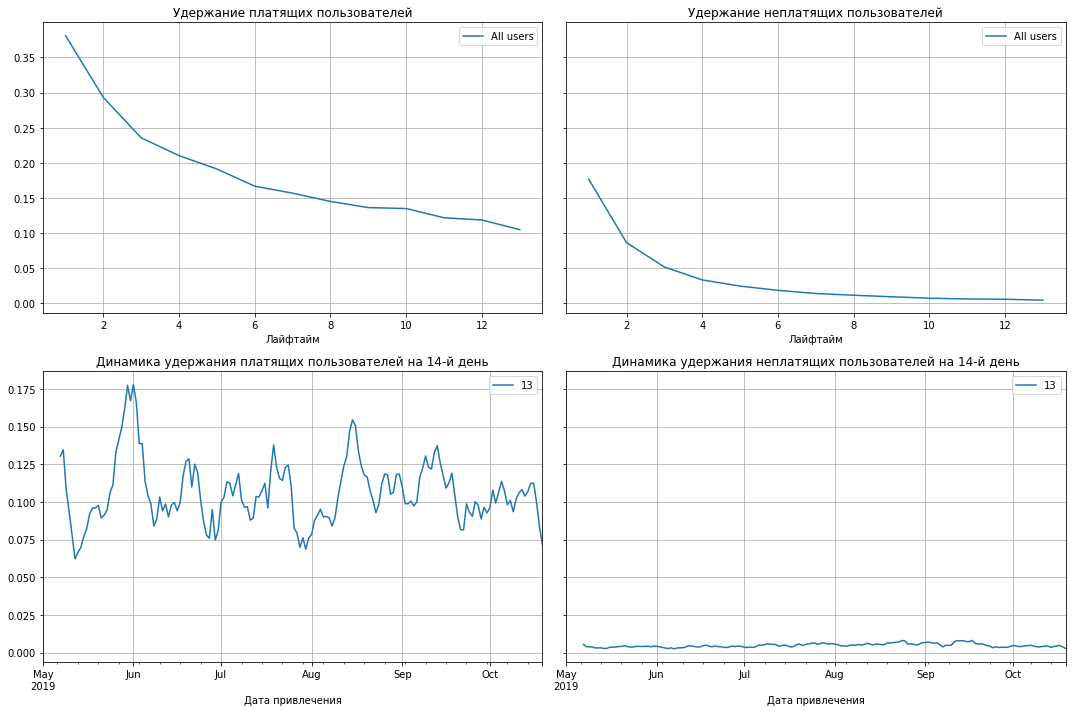

In [45]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    vizits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)
plot_retention(retention, retention_history, 14, window=7)

Платящие пользователи удерживаются значительно лучше неплатящих, что вполне логично. Удержание пользователей на 14 дней на протяжении рассматриваемого периода в целом достаточно стабильно для обеих категорий пользователей.

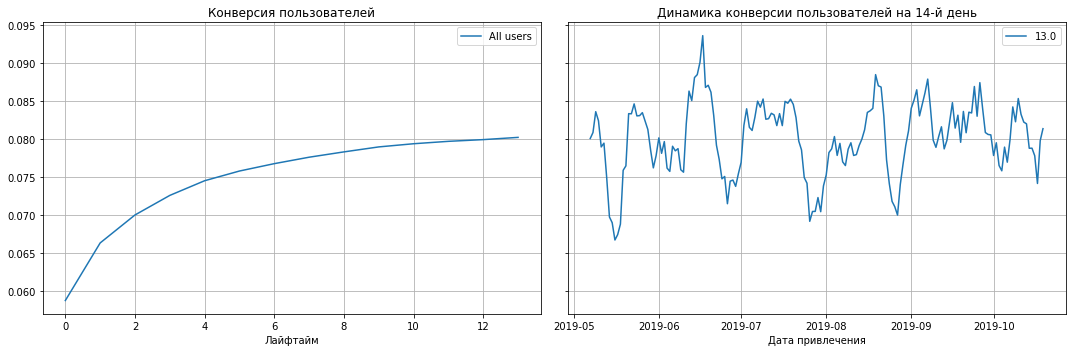

In [46]:
#расчет конверсии и построение графиков
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, 14, window=7)

На 14 день конверсия бользователей достигает 8%. График динамики конверсии на 14 день показывает, что конверсии достаточна стабильна на всем периоде.

### Анализ окупаемости рекламы с разбивкой по устройствам

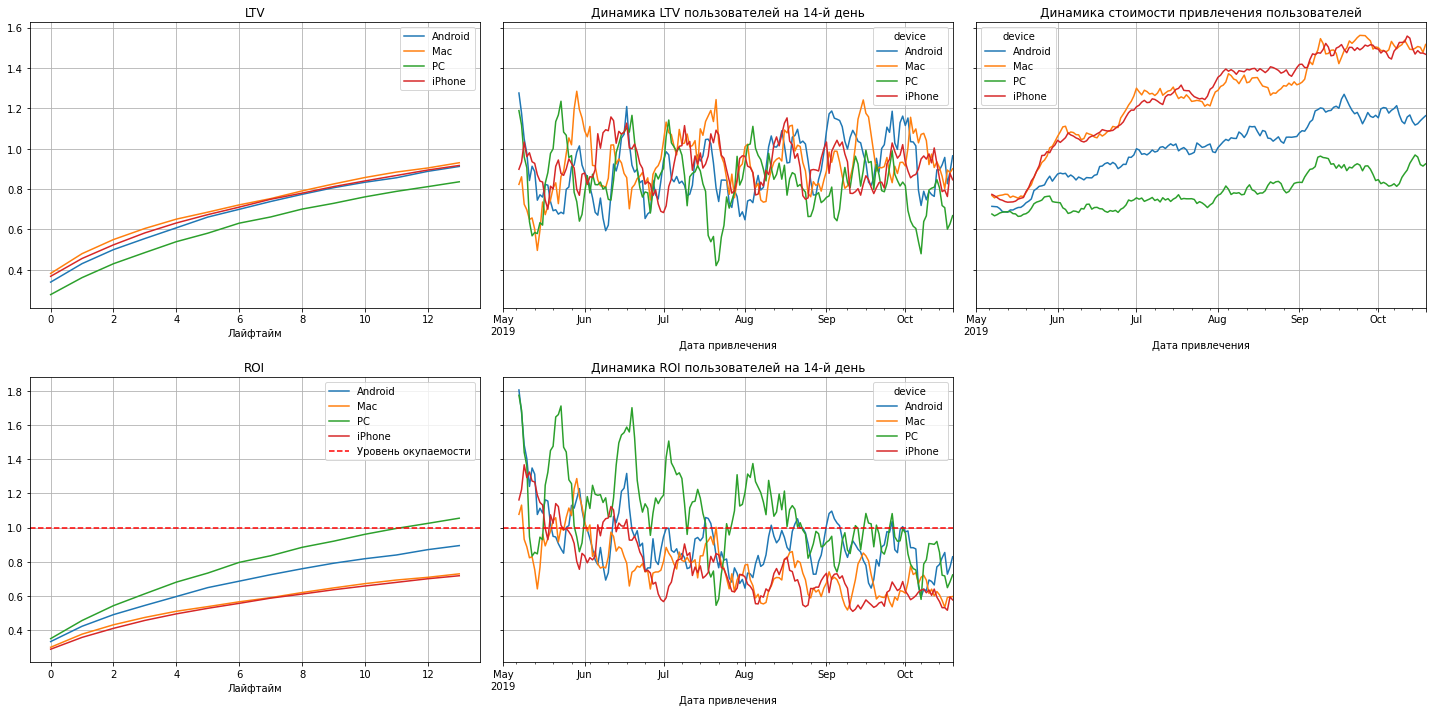

In [47]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Дороже всего обходятся пользователи iPhone и Mac. Возможно, это связано с тем, что большая часть пользователей этих устройств приходится на жителей США, куда уходит большая часть рекламного бюджета. 
В разрезе используемых устройств на 14 день инвестиции окупаются только для пользователей, заходящих в приложение с PC.

### Анализ окупаемости рекламы с разбивкой по странам

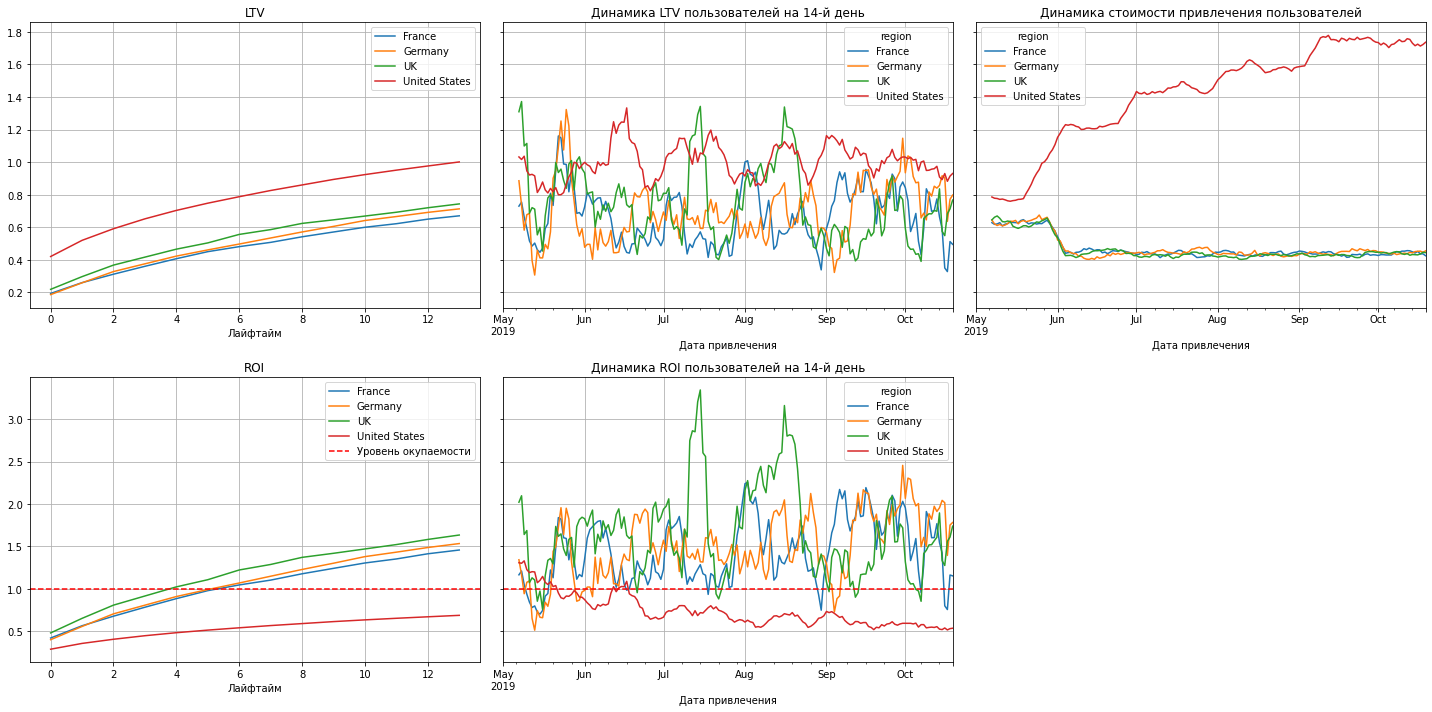

In [48]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Больше всего покупок совершают пользователи из США. Однако за счет больших затрат на рекламу, стоимость привлечения одного клиента из США значительно выше, чем в остальных странах. Привлечение пользователей из Германии, Франции и Великобритании окупается уже на 5-6 день, в то время как затраты, направленные на привлечение клиентов из США не окупаются даже к 14 дню. 


### Анализ окупаемости рекламы с разбивкой по рекламным каналам

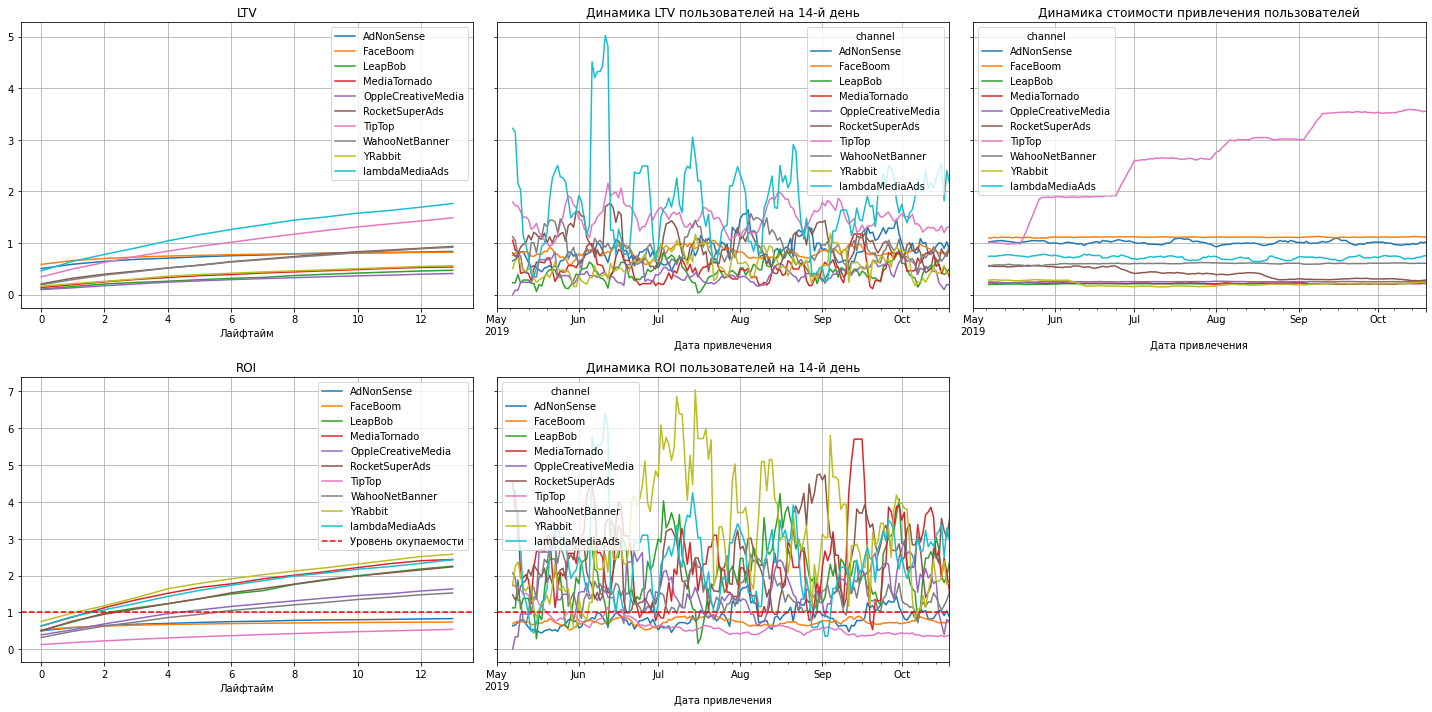

In [49]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Как уже было отмечено, основной рекламный бюджет направлен на рекламные источники США. Два самых дорогих источника являются убыточными для комапнии. Рассмотрим отдельно рекламные источники США и стран Европы.

#### Анализ рекламных источников США

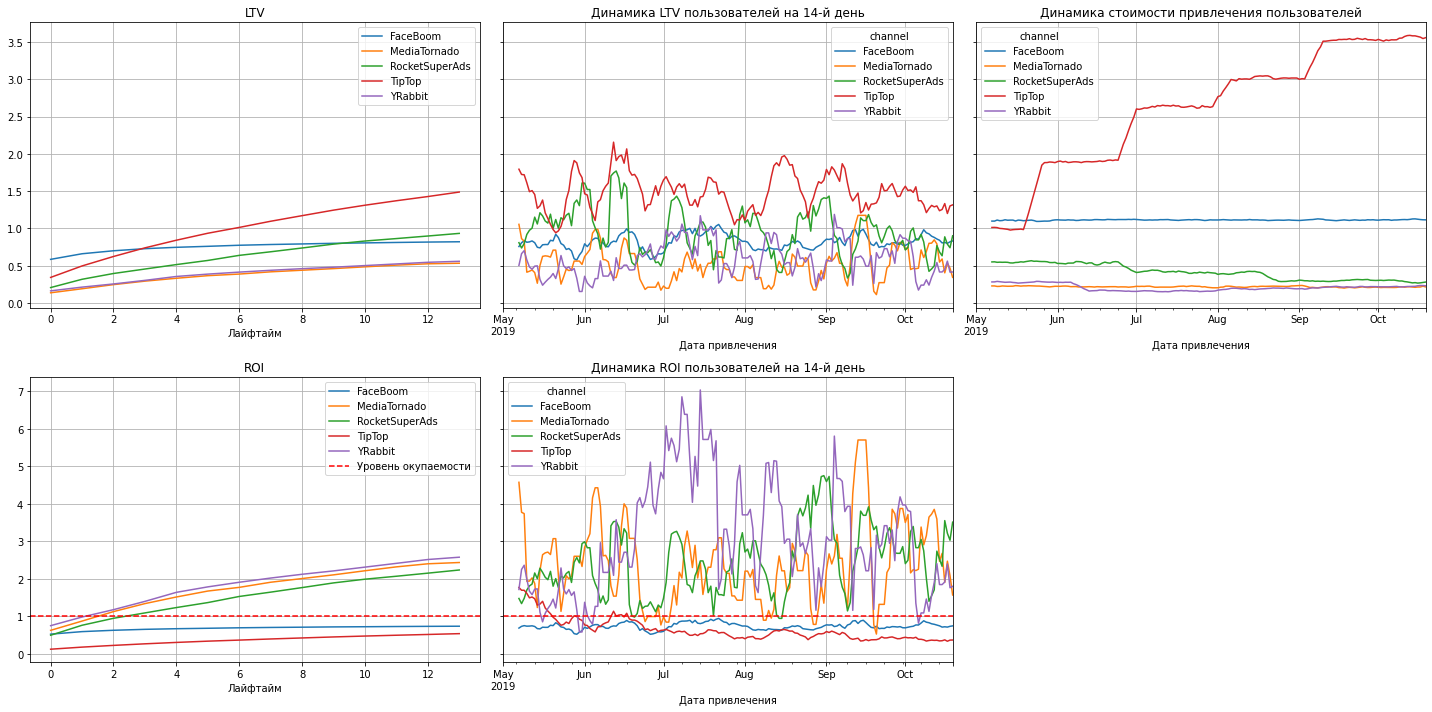

In [50]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('region=="United States"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

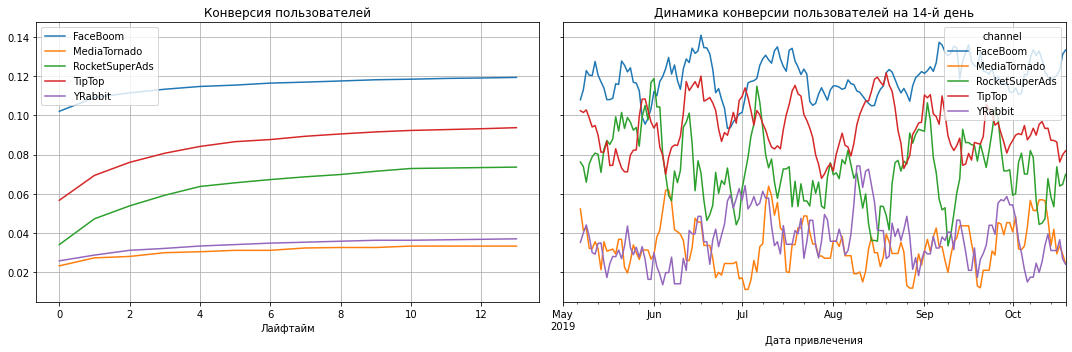

In [51]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles.query('region=="United States"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, 14, window=7)

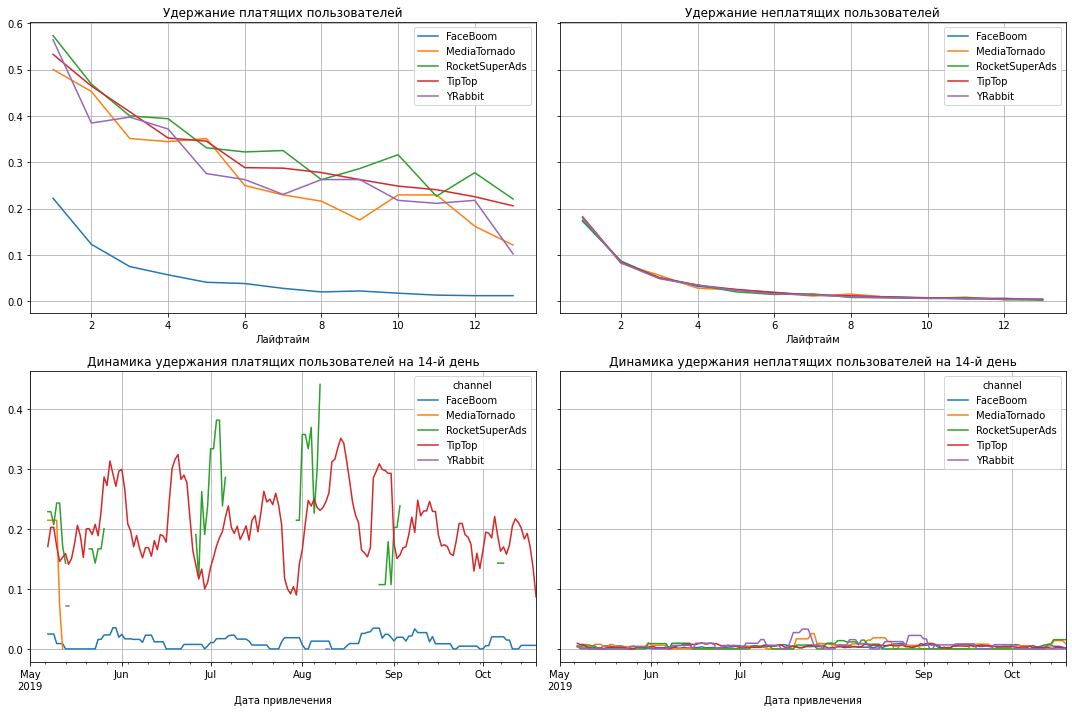

In [52]:
retention_raw, retention, retention_history = get_retention(
    profiles.query('region=="United States"'),
    vizits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_retention(retention, retention_history, 14, window=7)

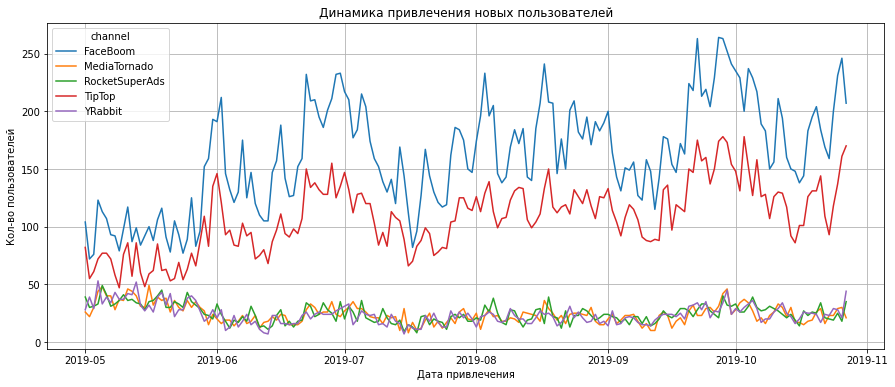

In [53]:
(
profiles.query('region=="United States"').pivot_table(index='dt', columns='channel', values='user_id', aggfunc='nunique')
    .plot(grid=True, title='Динамика привлечения новых пользователей', figsize=(15,6))
)
plt.xlabel('Дата привлечения')
plt.ylabel('Кол-во пользователей');

In [54]:
profiles.query('region=="United States" and payer==True').pivot_table(index='channel', columns='device', values='user_id', aggfunc='nunique')

device,Android,Mac,PC,iPhone
channel,,,,
FaceBoom,784,886,357,1530
MediaTornado,30,44,17,65
RocketSuperAds,54,97,33,168
TipTop,409,439,203,827
YRabbit,40,41,20,64


Несмотря на большое количество привлеченных клиентов и высокую конверсию рекламные каналы TipTop и FaceBoom не окупаются за 14 дней. 
TipTop является самым дорогим источником привлечения клиентов. Рост расходов на рекламу не сопровождался столько же быстрым ростом количества пользователей, что привело к значительному увеличению стоимости привлечения одного пользователя.
Несмотря на высокую конверсию пользователей из источника FaceBoom, их удержание находится на уровне неплатящих пользователей, что, вероятно, и приводит к убыточности данного рекламного источника.<br>



#### Анализ рекламных источников Европы

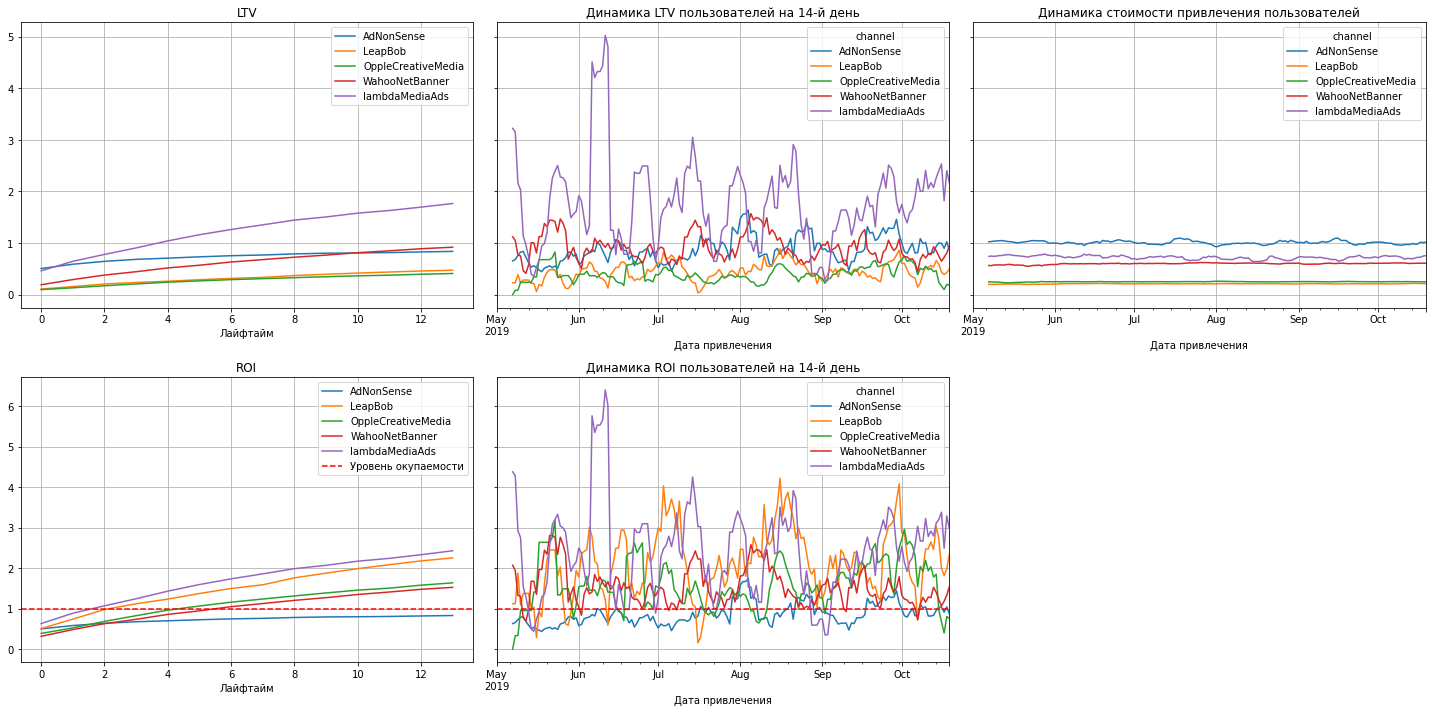

In [55]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('region!="United States"'),
    orders,
    observation_date,
    horizon_days,
     dimensions=['channel'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

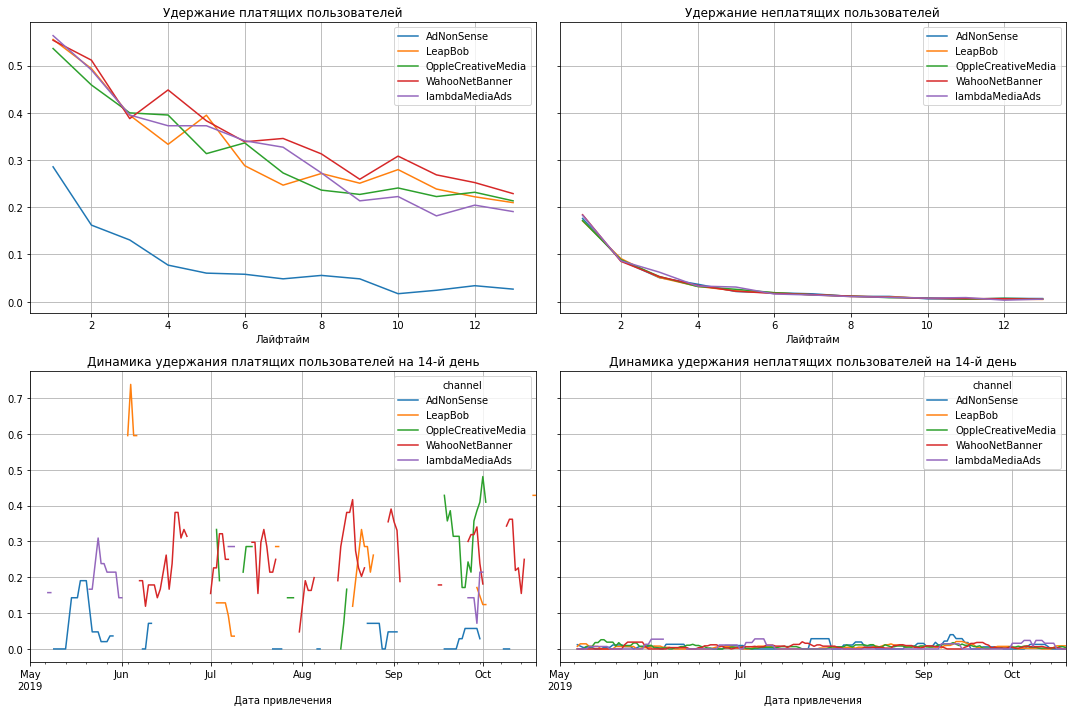

In [56]:
retention_raw, retention, retention_history = get_retention(
    profiles.query('region!="United States"'),
    vizits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_retention(retention, retention_history, 14, window=7)

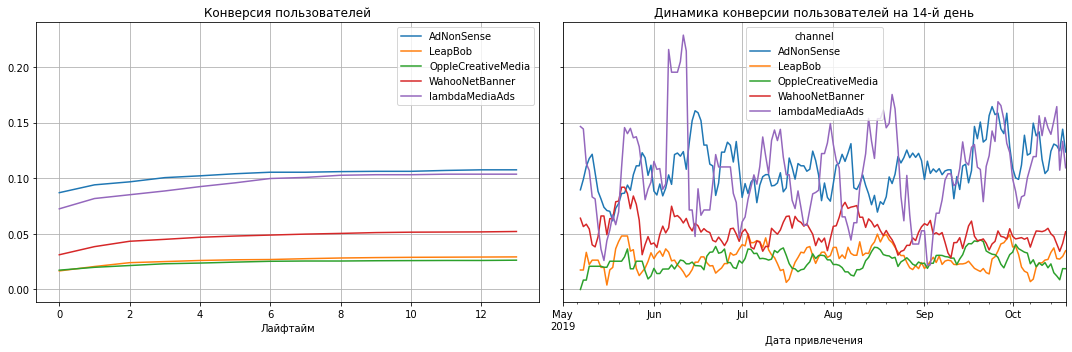

In [57]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles.query('region!="United States"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, 14, window=7)

Среди рекламных источников, привлекающих клиентов из стран Европы, к 6 дню окупаются все источники, кроме AdNonSense. Здесь затраты не окупаются и к 14 дню. Возможно, причина этого заключается в том, что несмотря на хороший показатель конверсии, удержание клиентов, привлекаемых из этого источника, находится на очень низком уровне. <br>
Самым перспективным выглядит канал lambdaMediaAds, обладающим самым высоким LTV, высокой конверсией и хорошим удержанием. Однако, количество привлеченных отсюда клиентов небольшое. 

#### Удержание и конверсия по устройствам для США

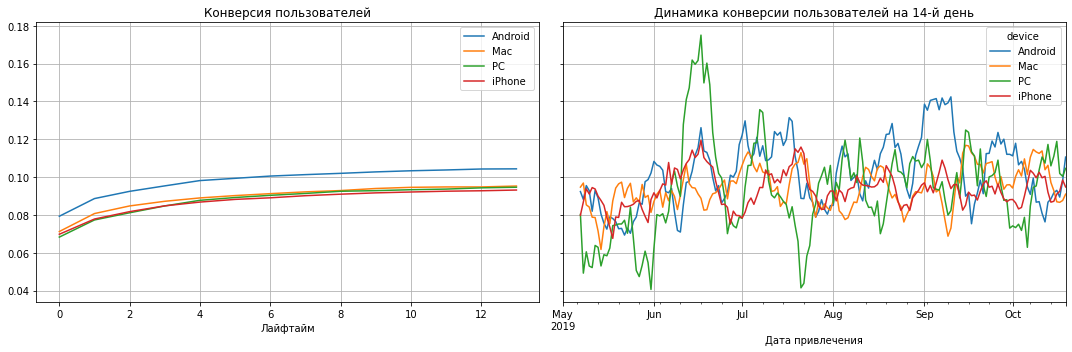

In [58]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles.query('region=="United States"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, 14, window=7)

Наиболее популярными устройствами США являются iPhone (45% ) и Мас(25%), однако конверсия в платящих пользователй тут ниже, чем для любителей Android.  Необходимо проверить нет ли проблем с приложением на IOS.

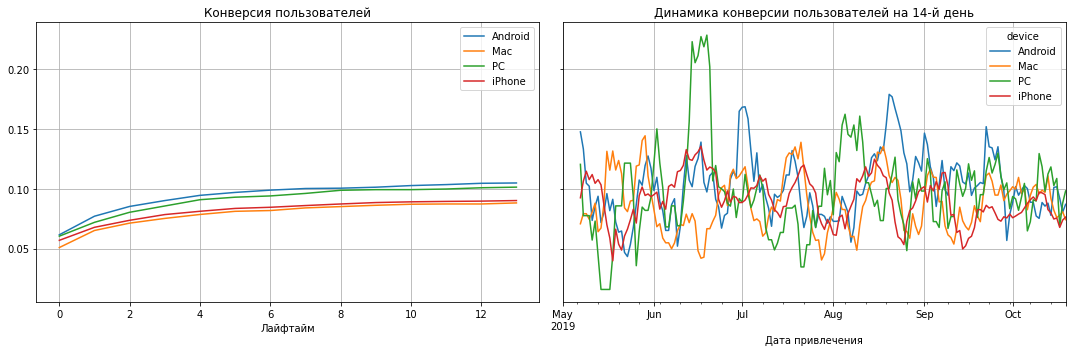

In [59]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles.query('channel=="TipTop"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, 14, window=7)

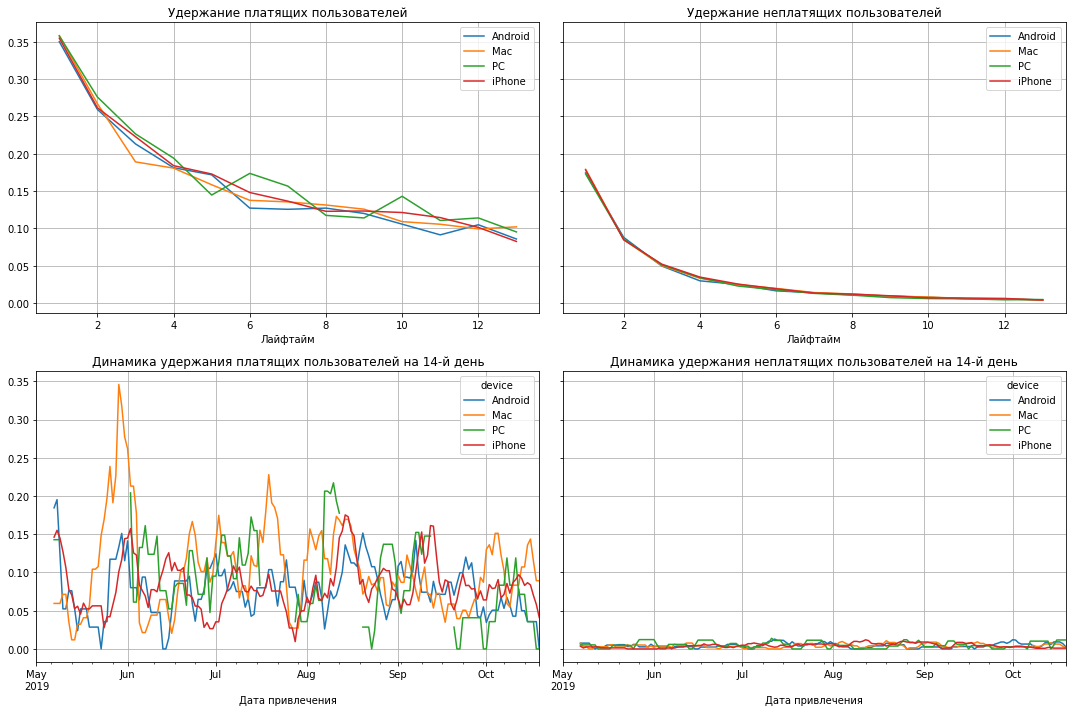

In [60]:
retention_raw, retention, retention_history = get_retention(
    profiles.query('region=="United States"'),
    vizits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_retention(retention, retention_history, 14, window=7)

Удержание платящих пользователей находится на одном уровне для всех устройств.

#### Удержание и конверсия по устройствам для Европы

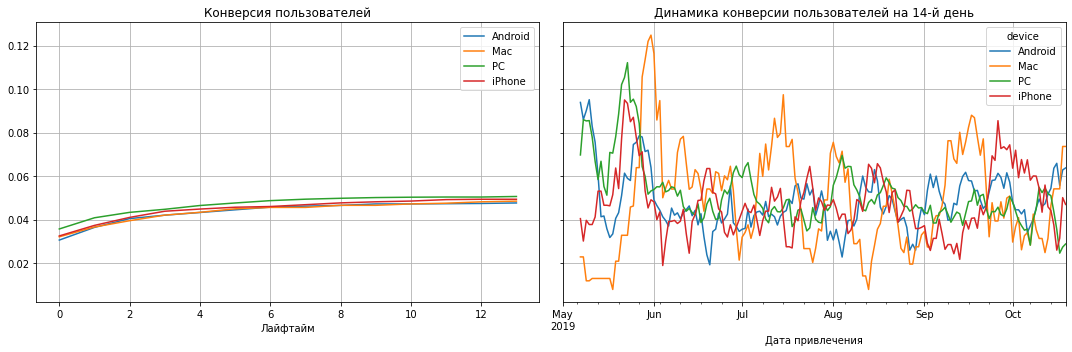

In [61]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles.query('region!="United States"'),
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, 14, window=7)

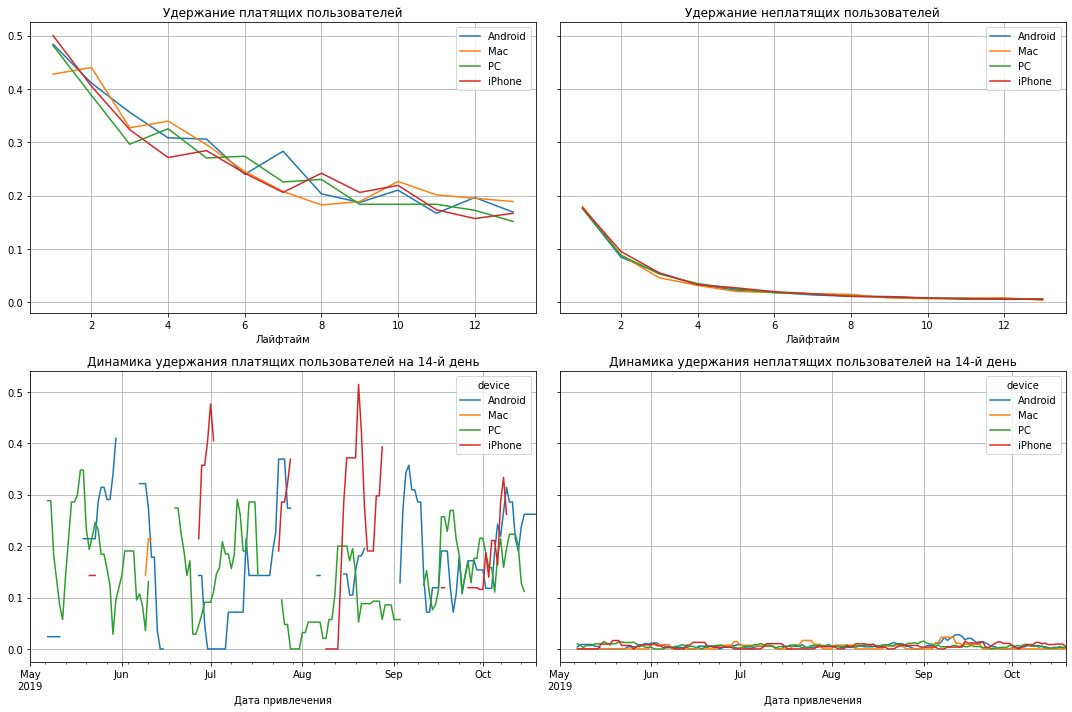

In [62]:
retention_raw, retention, retention_history = get_retention(
    profiles.query('region!="United States"'),
    vizits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_retention(retention, retention_history, 14, window=7)

Конверсия в сранах Европы для пользователей PC (наиболее часто используемого здесь устройства) немного выше, чем для остальных устройств. Удержание пользователей для всех устройств практичсеки не отличается.

## Выводы


Полученные данные содержат информацию о 150008 пользователях из 4 стран (США, Гермнаия, Франция, Великобритания), привлеченных за период с 1.05.2019 по 27.10.2019.<br>

2/3 пользователей заходили в приложение из США. Наибольшее количество платящих клиентов (78%) в рассматриваемом периоде также относится к США. Здесь же и самая высокая доля платящих пользователей, которая составляет 6,9%. Доля платящих пользователей в Германии - 4,1%, из Великоритании и Франции - 4,0% и 3,8% соответственно.<br>

36% пользователей пользуются iPhone, 23% предпочитают Android, по 20% - PC и Mac. При этом конверсия в платящих пользователей не сильно отличается между пользователями разных устройств и колеблется от 6,36% для пользователей Mac до 5,05% для пользователей PC. <br>

Анализ использования различных устройств по странам показал, что в европейских странах предпочтения схожи: 40% предпочитают PC, 30% используют Android, 20% - iPhone, 11%-Mac. Пользователи США, в свою очередь, предпочитают iPhone (45%) и Mac (25%), 20% используют Android, 10% - PC. <br>

Для продвижения продукта компания использует 10 рекламных источников, 5 из которых работают на рынке США и 5 в европейских странах. 
Основная часть рекламного бюджета (90 928,6 долл. или 86%) в рассматриваемом периоде была направлена на привлечение клиентов из США, 96% которого приходится на TipTop и FaceBoom. <br> 

Значительный рост стоимости привлечения пользователей на протяжении всего рассатриваемого периода приводел к снижению ROI ниже уровня окупаемости и получению убытков.
При этом LTV пользователей на 14 день достаточно стабилен, что свидетельствует об отсутствии снижения качества пользователей в рассматриваемом периоде. <br>

В июне 2019 были значительно увеличены расходы по направлениям TipTop и FaceBoom. При этом величина расходов на продвижение продукта на TipTop росла на протяжении всего периода. Привлечение одного пользователя на TipTop обходится компании в среднем в 2,8 долл., в то время как средние затраты на привлечение одного пользователя на FaceBoom в 2,5 раза ниже и составляют 1,11 долл. Стоимость одного пользователя привлеченного AdNonSense составила 1,01 долл.<br>

Несмотря на большое количество привлеченных клиентов и высокую конверсию рекламные каналы TipTop и FaceBoom не окупаются за 14 дней. <br>

TipTop является самым дорогим источником привлечения клиентов. Рост расходов на рекламу не сопровождался столько же быстрым ростом количества пользователей, что привело к значительному увеличению стоимости привлечения одного пользователя. <br>
Анализ конверсии для различных устройств пользователей США показал более низкую конверсию на iPhone и Mac, несмотря на преобладание этих устройств в США. Необходимо исключить проблемы с установкой, покупкой приложения на этих устройствах. 

Несмотря на высокую конверсию пользователей из источника FaceBoom, их удержание находится на уровне неплатящих пользователей, что, вероятно, и приводит к убыточности данного рекламного источника.<br>

Среди рекламных источников, привлекающих клиентов из стран Европы, к 6 дню окупаются все источники, кроме AdNonSense. Здесь затраты не окупаются и к 14 дню. Возможно, причина этого заключается в том, что несмотря на хороший показатель конверсии, удержание клиентов, привлекаемых из этого источника, находится на очень низком уровне. <br>

Таким образом, необходимо проанализировать причину отсутствия увеличения количества пользователей в отклик на увеличение расходов на TipTop (проблемы с приложением, сайтом и т.д.). 
Выяснить причину плохого удержания пользователей из источников FaceBoom и AdNonSense.

На европейсокм рынке перспективным выглядит канал lambdaMediaAds, обладающим самым высоким LTV, высокой конверсией и хорошим удержанием. Однако, количество привлеченных отсюда клиентов небольшое. 
